In [1]:
from Game import *

Version:  0.2.32


## Game functions

In [2]:
def initial_state():
    state=Board(3,3)
    state.pieces=[".","X","O"]
    return state

def show_state(state):
    print(state)
    
def valid_moves(state,player):
    # run through all the spots
    # if it is empty, then append that
    # location to the possible moves
    
    moves=[]
    for location in range(9):
        if state[location]==0:
            moves.append(location)
            
    return moves  

def update_state(state,player,move):
    new_state=state
    
    new_state[move]=player
    return new_state    
    
def win_status(state,player):
    # the state is *after* the move for the player

    #  0  1  2 
    #  3  4  5 
    #  6  7  8   
    
    for start,middle,end in [
        [0,1,2],[3,4,5],[6,7,8],
        [0,3,6],[1,4,7],[2,5,8],
        [0,4,8],[2,4,6],
                ]:
        
        if state[start]==player and state[middle]==player and state[end]==player:
            return "win"
        
    if player==1:
        other_player=2
    else:
        other_player=1
    
    if not valid_moves(state,other_player):
        return "stalemate"
    
    
    
    


## Agent Functions

In [3]:
def human_move(state,player):
    
    state.show_locations()
    print("Player",player)
    move=int(input("which square to move?"))
    return move

human_agent=Agent(human_move)     

In [4]:
def random_move(state,player):
    
    move=random.choice(valid_moves(state,player))
    return move


random_agent=Agent(random_move)

In [5]:
from Game.minimax import *
def minimax_move(state,player):

    values,moves=minimax_values(state,player,display=True)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [7]:
player=1
state=initial_state()
minimax_values(state,player,display=True)

  Choice Time: 2.136528730392456 seconds 


([0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 7, 6, 5, 4, 3, 2, 1, 0])

In [8]:
g=Game()
g.display=False
g.run(minimax_agent,random_agent)

  Choice Time: 2.1416032314300537 seconds 
  Choice Time: 0.11216592788696289 seconds 
  Choice Time: 0.005842924118041992 seconds 
  Choice Time: 0.0003819465637207031 seconds 
  Choice Time: 5.793571472167969e-05 seconds 


[1]

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
T=[2.14,.112,.0058,.00038,5.89e-5]

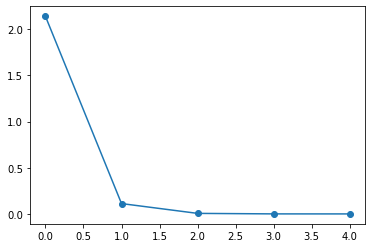

In [3]:
plot(T,'-o')

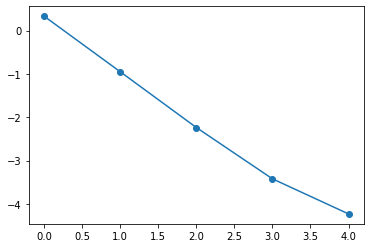

In [4]:
plot(log10(T),'-o')

the log plot has a slope of about -1.  A little closer is,

In [5]:
rise = log10(T)[3]-log10(T)[0]
run = 3. # number of moves

In [7]:
slope=rise/run
slope

-1.2502100589107936

In [9]:
intercept=log10(T)[0]
intercept

0.33041377334919086

In [10]:
10**.33

2.137962089502232

so the equation for the time would be,

$$
T=10^{\rm intercept} \cdot 10^{-|slope|\cdot {\rm move}}= 2.14\times 10^{-1.25 \cdot {\rm move}}
$$


Some other data from Chomp

In [11]:
n=[4,6,8,12,16,20]
T=[.001,.03,.13,1.87,5.29,4*60+35]

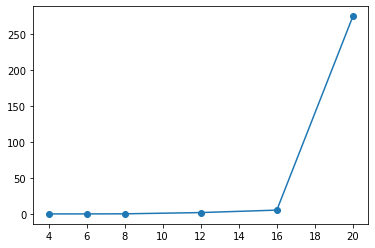

In [12]:
plot(n,T,'-o')

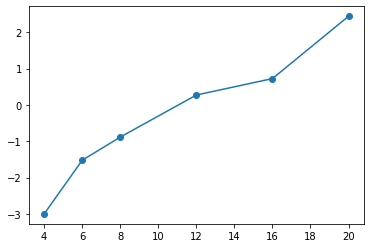

In [13]:
plot(n,log10(T),'-o')

In [17]:
slope,intercept=polyfit(n,log10(T),1)
slope,intercept

(0.30060883095087354, -3.6357480438881993)

In [18]:
size=80
10**intercept * 10**(slope*size)

2.5879652002496296e+20

In [19]:
10**intercept * 10**(slope*size)/60/60/24/365.25

8200766852516.127